In [9]:
import numpy as np 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
np.random.seed(42)

In [117]:
employee = [f"EMP_{str(i).zfill(3)}" for i in range(1,31)]
dates =pd.date_range("2025-07-01",periods=30,freq="D")

In [118]:
data = {
      "Date":np.tile(dates,len(employee)),
      "Employee" : np.repeat(employee,len(dates)),
      "Working_Hours" :np.random.uniform(4,10,size=len(dates)*len(employee)).round(2)
}    
    

In [119]:
df = pd.DataFrame(data)

In [120]:
df.to_csv("employee_working_hours.csv",index=False)

In [121]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [122]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee"].nunique())

         Date Employee  Working_Hours
0  2025-07-01  EMP_001           9.49
1  2025-07-02  EMP_001           7.20
2  2025-07-03  EMP_001           4.95
3  2025-07-04  EMP_001           8.18
4  2025-07-05  EMP_001           8.76
       Working_Hours
count     900.000000
mean        7.019400
std         1.744721
min         4.000000
25%         5.627500
50%         7.010000
75%         8.550000
max         9.990000
30


In [123]:
total_hours = df_csv.groupby("Employee")["Working_Hours"].sum().sort_values(ascending = False)

In [124]:
avg_daily = df_csv.groupby("Employee")["Working_Hours"].mean()

In [125]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_Hours"] < threshold_high
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02  EMP_001           7.20          False            True
2  2025-07-03  EMP_001           4.95           True            True
3  2025-07-04  EMP_001           8.18          False            True
4  2025-07-05  EMP_001           8.76          False            True
5  2025-07-06  EMP_001           5.90          False            True


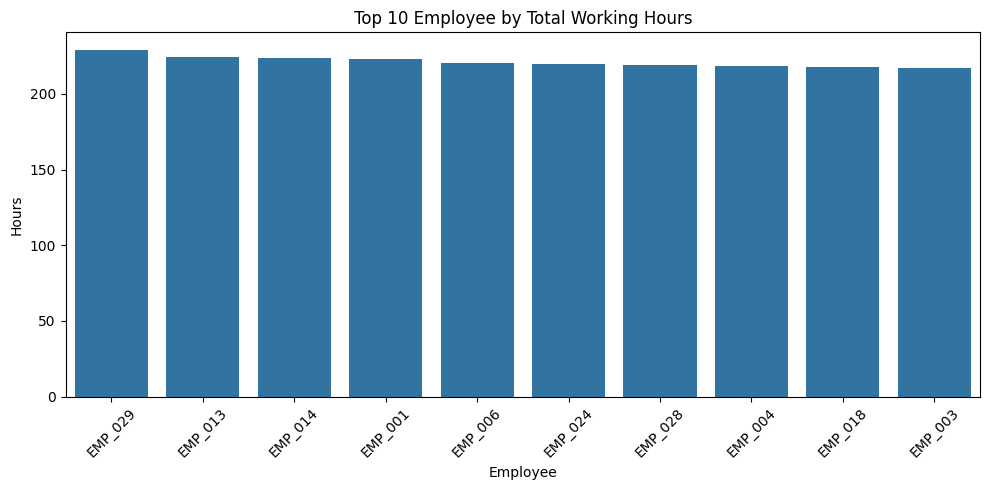

In [126]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [127]:
Grades = df.loc[(df["Employee"] == "EMP_003")]

In [129]:
Grades.head()

,Date,Employee,Working_Hours
60,2025-07-01,EMP_003,7.91
61,2025-07-02,EMP_003,7.73
62,2025-07-03,EMP_003,6.11
63,2025-07-04,EMP_003,9.05
64,2025-07-05,EMP_003,6.83
